# Сборный Проект

**Заголовок:** Исследование факторов, которые определяют успешность компьютерных игр

**Описание проекта:** Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:** Проанализировать данные и проверить гипотезы, которые помогут выявить факторы для определения успешности компьютерных игр.

**Ход исследования**

- Подготовка данных: загрузка и изучение общей информации из предоставленного датасета
- Предобработка данных:корректировка типа данных,  дубликатов и проверка на пропуски 
- Исследовательский анализ данных: визуализация общих данных, сделать прогнозы на основе данных, написать выводу об интересующий вопросах
- Портрет клиента: составить портрет пользователя для каждого региона
- Проверка гипотез: проверяем гипотезы

**Общий вывод:** Резюмирования полученных результатов, формулировка ключевых выводов и рекомандаций 

С помощью данного исследования дать анализ данных пользователях и их покупок комьютерных игр, также для определение факторов, которые влияют на успешность игры.  

### Шаг 1. Загрузка данных и библиотек

In [1]:
#Импортирование нужных библиотек
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import binom, poisson, norm
from math import sqrt, factorial

In [2]:
#Загрузка датасета и информация про датасет
games = pd.read_csv('/datasets/games.csv')
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод:** 
- Name — название игры 
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


- Для всех столбцов поменять название, чтобы совпадал с критериями змеиного регистра
- Для последних трех столбцов найти методы заполнения пропусков и если они заполнить
- Для последних двух столбцов изменить тип данных с object на float



###  Предобработка данных

In [3]:
#Приведение названий столбцов в змеиний регистр
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
# Проверка на наличие дубликатов
print('Количество явных дубликатов в датафрейме:', games.duplicated().sum())

Количество явных дубликатов в датафрейме: 0


In [5]:
print('Количество уникальных значений name:', games['name'].nunique())
games['name'].unique()

Количество уникальных значений name: 11559


array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [6]:
print('Количество уникальных значений:', games['platform'].nunique())
games['platform'].unique()

Количество уникальных значений: 31


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
print('Количество уникальных значений:', games['year_of_release'].nunique())
games['year_of_release'].unique()

Количество уникальных значений: 37


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

#### Работа с пропусками в данных

In [9]:
# считаем пропуски в столбцах
games.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Данные пропуски могли быть из за ошибки выгрузки датасета, либо же игры настолько не популярны, что критики и игроки не обращали на них внимание и он остался без загрузок и оценки. 

In [10]:
#Работа с пропусками в столбце name
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Промежуточный вывод:**В строках, где нет имени, также отсуствуют жанр игры. Так как тяжело заменить чем то другим или по методу среднего, медианы, так как это наименование, то их можно удалить, так как их меньше 10% от общего кол-ва строк

In [11]:
#удаляем пропуски в столбце name
games = games.dropna(subset = ['name'])

In [12]:
#Работа с пропусками в столбце year_of_release
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Промежуточный вывод:** можно заметить, что в наименование некоторых игр, есть год выпуска, можно заполнить год выпуска через наименование игры. 

In [13]:
#Функция для извлечение года выпуска игры из наименования
def find_year(name_string, fmt='%Y'):
    find_year = re.findall("(?<!\d)\d{4}(?!\d)", str(name_string))
    if len(find_year):
        year = int(find_year[-1])
        return year
games['year_of_release'] = games['year_of_release'].fillna(games['name'].apply(find_year))
print('Заполнили ', (269 - games['year_of_release'].isna().sum()), 'пустых значений')
print(games.iloc[183])

Заполнили  17 пустых значений
name               Madden NFL 2004
platform                       PS2
year_of_release             2004.0
genre                       Sports
na_sales                      4.26
eu_sales                      0.26
jp_sales                      0.01
other_sales                   0.71
critic_score                  94.0
user_score                     8.5
rating                           E
Name: 183, dtype: object


In [14]:
#смотрим уникальные данные в столбце user_score и critic_score
print('уникальные данные в столбце user_score',games['user_score'].unique())
print('уникальные данные в столбце critic_score',games['critic_score'].unique())

уникальные данные в столбце user_score ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
уникальные данные в столбце critic_score [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


**Промежуточный вывод** так как в этих столбцах пропущенных значений слишком много, чтобы мы могли заполнить их данными по типу среднее значение или медианой, мы их заполним маркерным значением -1, чтобы оно не повлияло на дальнейшую статистику.

Tbd – означает to be determined,  используется в данном случае если оценка еще не вышла или ее оценка решается критиками или пользователями. Фактически это тоже самое, что и NaN.

In [15]:
#Заполняем пропуски
games['user_score'] = games['user_score'].replace('tbd', np.NAN)
games['year_of_release'] = games['year_of_release'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)
games['critic_score'] = games['critic_score'].fillna(-1)


In [16]:
#смотрим уникальные данные в столбце rating
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)


**Промежуточный вывод** так как rating является категориальными данными, рассчетными значениями тоже не получится их заполнить, поэтому заполним как unknown.

In [17]:
#Заполняем пропуски
games['rating'] = games['rating'].fillna('unknown')

In [18]:
# считаем пропуски в столбцах
games.isna().sum().sort_values(ascending=False)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [19]:
# заменяем тип данных в столбце year_of_release в формат int.
games['year_of_release'] = games['year_of_release'].astype(int)

# Заменим тип данных в столбце user_score в формат float
games['user_score'] = games['user_score'].astype('float')
#чтобы было легче сравнивать user_score и critic_score переведем их в единый формат
games['user_score'] = games['user_score'] *10

print(games.info())
display(games.sample(15))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6056,Disgaea 5: Alliance of Vengeance,PS4,2015,Role-Playing,0.11,0.08,0.06,0.04,80.0,81.0,T
518,Assassin's Creed: Brotherhood,PS3,2010,Action,1.87,0.55,0.11,0.29,90.0,82.0,M
5063,Skylanders Giants,WiiU,2012,Action,0.22,0.12,0.00,0.03,80.0,69.0,E10+
11821,Hero Bank,3DS,2014,Role-Playing,0.00,0.00,0.07,0.00,-1.0,-10.0,unknown
15518,The Sims 2: Happy Holiday Stuff,PC,2006,Simulation,0.01,0.01,0.00,0.00,-1.0,-10.0,T
14490,The Voice,PS3,2014,Action,0.02,0.00,0.00,0.01,-1.0,-10.0,unknown
10343,Pro Evolution Soccer 2016,XOne,2015,Sports,0.04,0.06,0.00,0.01,85.0,62.0,E
11163,Harvest Moon: Boy & Girl,PSP,2005,Simulation,0.08,0.00,0.00,0.01,-1.0,-10.0,unknown
13679,Pocket Pool,PSP,2007,Action,0.04,0.00,0.00,0.00,37.0,-10.0,M
9690,Are You Smarter than a 5th Grader? Game Time,X360,2009,Puzzle,0.12,0.00,0.00,0.01,-1.0,13.0,E


#### Столбец с суммарными продажи во всех регионах

In [20]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12226,Armored Core: Nine Breaker,PS2,2004,Simulation,0.03,0.03,0.00,0.01,57.0,82.0,T,0.07
4113,Bakugan Battle Brawlers: Defenders of the Core,DS,2010,Action,0.41,0.02,0.02,0.03,-1.0,-10.0,E10+,0.48
9531,My Baby: First Steps,Wii,2009,Simulation,0.12,0.00,0.00,0.01,-1.0,-10.0,E,0.13
14487,Winning Post 7 2009,PSP,2009,Sports,0.00,0.00,0.03,0.00,-1.0,-10.0,unknown,0.03
2068,PES 2009: Pro Evolution Soccer,X360,2008,Sports,0.13,0.76,0.03,0.09,-1.0,-10.0,unknown,1.01
2712,Harry Potter and the Half-Blood Prince,Wii,2009,Action,0.28,0.39,0.00,0.08,60.0,60.0,E10+,0.75
5137,Bottom of the 9th,N64,1999,Sports,0.37,0.00,0.00,0.00,-1.0,-10.0,unknown,0.37
7759,Great Phoenix Wright: Ace Attorney - Naruhodou...,3DS,2015,Action,0.00,0.00,0.19,0.00,-1.0,-10.0,unknown,0.19
3080,Brothers In Arms: Road to Hill 30,XB,2005,Shooter,0.49,0.14,0.00,0.02,88.0,80.0,M,0.65
8607,Angry Birds Star Wars,XOne,2013,Strategy,0.11,0.04,0.00,0.02,53.0,69.0,E,0.17


**Вывод:**

- Были удалены две строки с наименованием игры
- Пропуски в user_score, critic_score были заменены на маркерные значение, также их превели в единый оценочный формат
- Пропуски в rating были заменены на unknown
- изменены типы данных в столбцах 'year_of_release' на int и  'user_score' на float

### Исследовательский анализ данных

In [21]:
# Функция для отрисовывания столбчатых диаграмм
def graph_bar(data, yaxes, xlab, ylab, title):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x = data.index, y = yaxes, data = data)
    ax.set(xlabel = xlab, ylabel = ylab, title = title)
    plt.xticks(rotation = 45)
    plt.show()

In [22]:
# Функция для отрисовывания линейных диаграмм
def graph_line(data, xaxes, yaxes, xlab, ylab, title):
    plt.figure(figsize=(10,6))
    ax = sns.lineplot(x = xaxes, y = yaxes, data = data, hue = 'platform')
    ax.set(xlabel = xlab, ylabel = ylab, title = title)
    plt.show()

In [23]:
# Функция для отрисовывания ящика с усами 
def graph_box(xaxes, yaxes, xlab, ylab, xlim, title):
    plt.figure(figsize=(10,6))
    ax = sns.boxplot(x = xaxes, y = yaxes)
    ax.set(xlabel = xlab, ylabel = ylab, xlim = xlim, title = title)
    plt.show()

In [24]:
# Функция для отрисовывания графиков корреляции
def graph_scatter(data, platform):
    plt.figure(figsize=(10,6))
    ax = sns.scatterplot(x='total_sales', y='critic_score', data = data, alpha = 0.5, color='red',)
    ax = sns.scatterplot(x='total_sales', y='user_score', data = data, alpha = 0.2, color='blue');
    ax.set(xlabel = 'Продажи (млн. копий)', ylabel = 'Оценки', title = platform)
    plt.show()
    print(f'Корреляция продаж и оценки критиков для платформы "{platform}":',
        round(data['total_sales'].corr(data['critic_score']),3))
    print(f'Корреляция продаж и оценки пользователей для платформы "{platform}":',
        round(data['total_sales'].corr(data['user_score']),3))

In [25]:
# Функция для отрисовывания круговых диаграмм
def graph_pie(data, title):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))
    palette = sns.color_palette('pastel')[ 0:5 ]
    fig.suptitle(title)
    ax1.pie(data['na_sales'], labels = data.index, autopct='%1.1f%%', colors = palette, normalize=True)
    ax1.set_title('Северная Америка')
    ax2.pie(data['eu_sales'], labels = data.index, autopct='%1.1f%%', colors = palette, normalize=True)
    ax2.set_title('Европа')
    ax3.pie(data['jp_sales'], labels = data.index, autopct='%1.1f%%', colors = palette, normalize=True)
    ax3.set_title('Япония')
    ax4.pie(data['other_sales'], labels = data.index, autopct='%1.1f%%', colors = palette, normalize=True)
    ax4.set_title('Другие регионы')
    fig.tight_layout()

#### Cколько игр выпускалось в разные годы

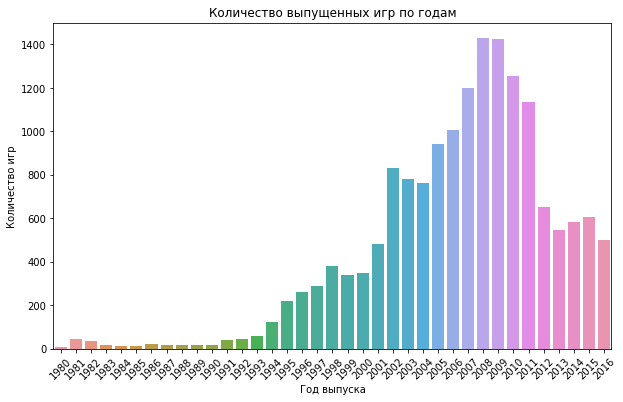

In [26]:
games_years = games[games['year_of_release'] > 0].pivot_table(index = 'year_of_release',
        values = 'name', aggfunc = 'count').sort_values('year_of_release', ascending = False)
graph_bar(games_years, 'name', 'Год выпуска', 'Количество игр', 'Количество выпущенных игр по годам')

**Промежуточный вывод:** Рост количества игр начался с 2001 года, пик был на 2008-2009 годах, возможно это связано с выходом какой либо платформы. Также был спад с 2011 года, возможно это связано с развитием мобильных игр и популярностью социальных сетей. 

Также заметно, что до 1994 года выпускалось меньше 100 игр, стоит брать в следующие анализы брать период от 1994 года.

#### Количество выпущенных игр по платформам.

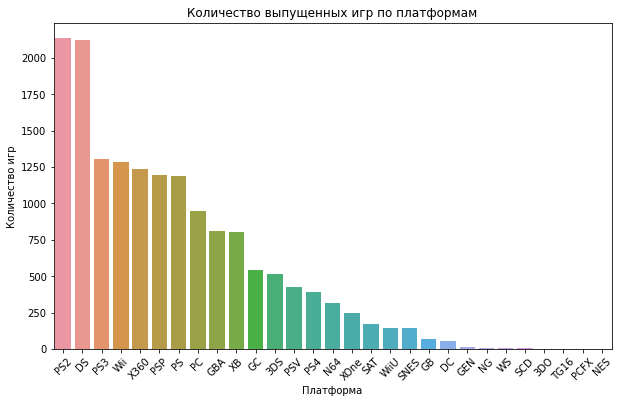

In [27]:
platform_count = games[games['year_of_release'] >= 1994].pivot_table(index = 'platform',
      values = 'name', aggfunc = 'count').sort_values('name', ascending = False)
graph_bar(platform_count, 'name', 'Платформа', 'Количество игр','Количество выпущенных игр по платформам')

**Промежуточный вывод:** Лидеры по количеству игр занимает PS2 и DS, далее эти места занимают PS3,Wii,X360,PSP и PS. 

#### Изменения продаж лидеров рынка платформ

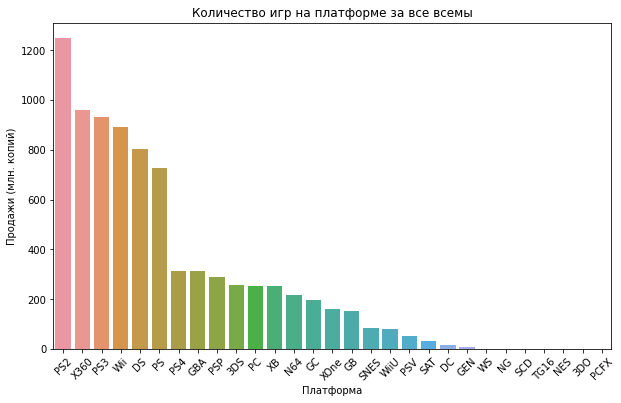

In [28]:
platforms_sales=games[games['year_of_release'] >= 1994].pivot_table(index = 'platform',
      values ='total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False)
graph_bar(platforms_sales, 'total_sales', 'Платформа', 'Продажи (млн. копий)', 'Количество игр на платформе за все всемы')

**Промежуточный вывод:** Лидеры продаж игр по всем регионам занимает PS2, с отставанием 250 - 400 млн копий занимают платформы такие как X360,PS3,Wii,DS

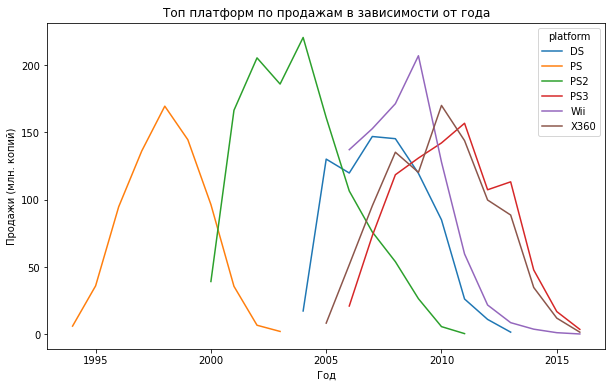

In [29]:
# создаем список лидеров по продажам
platforms_top = platforms_sales.head(6).index.tolist()
# создаем сводную таблицу топ-платформ по продажам в зависимости от года
platforms_top_sales = games[(games['platform'].isin(platforms_top)) & (games['year_of_release'] >= 1994)].pivot_table(
    index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
#создаем график продаж в зависимости от года по каждой платформе
graph_line(platforms_top_sales, 'year_of_release', 'total_sales', 'Год',
           'Продажи (млн. копий)', 'Топ платформ по продажам в зависимости от года')

**Промежуточный вывод:** Лидеры продаж все также PS2 и Wii. Также по графику видно, что примерное продолжительность платформы существования на рынке примерно 10 лет, а потом их продажи стремительно падают. Это скорее всего связано с развитием кампаний и новыми технологиями

#### Какие платформы лидируют по продажам, растут или падают?

Так как средняя продолжительность платформы это 10 лет, стоит взять данные за последние 10 лет, как за актуальные данные. Также стоит взять данные за последние 3 года, так как это примерное время, в котором платформа находится в топе. 

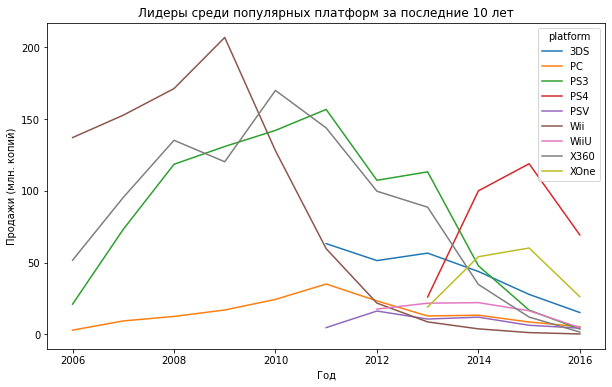

In [30]:
# создаем список актуальных на 2016 год платформ
actual_platforms = games[(games['year_of_release'] >= 2016)].pivot_table(index = ['platform'],
    values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False).head(10).index.tolist()
#создаем список актуальных с 2006 года
platforms_trends = games[(games['platform'].isin(actual_platforms)) & (games['year_of_release'] >= 2006)].pivot_table(
    index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
# Строим график
graph_line(platforms_trends, 'year_of_release', 'total_sales', 'Год',
           'Продажи (млн. копий)', 'Лидеры среди популярных платформ за последние 10 лет')

**Промежуточный вывод:** Как можно заметить за последние 10 лет поменялись лидеры продаж, и с начала 2013 года, ими становятся платформы такие как PS4 и Xone. Стоит рассмотреть графики за последние 3 года

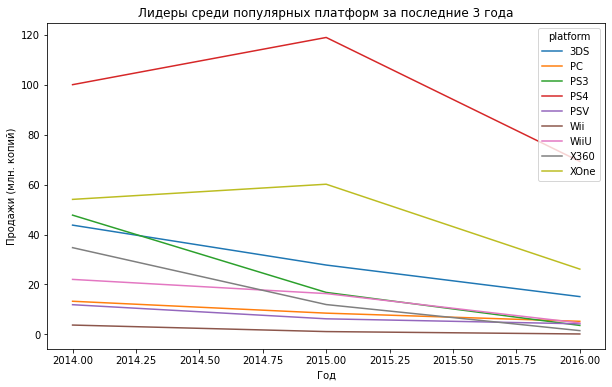

In [31]:
platform_3_year = games[(games['platform'].isin(actual_platforms)) & (games['year_of_release'] >= 2014)].pivot_table(
    index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
# Построим график
graph_line(platform_3_year, 'year_of_release', 'total_sales', 'Год',
           'Продажи (млн. копий)', 'Лидеры среди популярных платформ за последние 3 года')

**Промежуточный вывод:** Здесь лидеры также PS4 и Xone, однако продажи у всех платформ снижаются, возможно связано с тем, продолжительность времени нахождения в лидерах сейчас снижается из за быстрого развития. На данный момент из прибыльных платформ это PS4 и Xone, однако стоит подождать выхода новой платформы, так как продажи снижаются. 

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Так как продолжительность нахождения лидеров примерно 3 года, стоит взять именно данные за последние три года

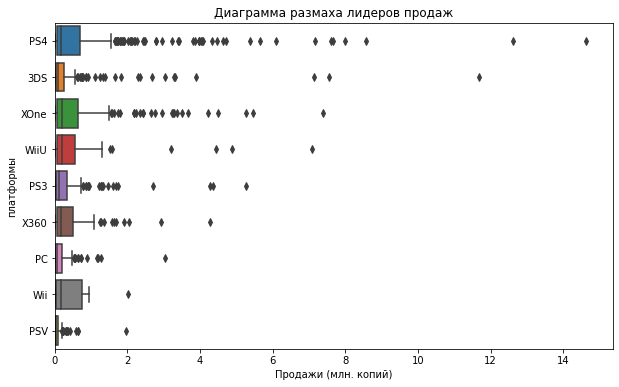

In [32]:
#Создаем лист актуальных платформ 
actual_platform = games[(games['platform'].isin(actual_platforms)) & (games['year_of_release'] >= 2014)]
#Полная диаграмма размаха
xlim = [0,None]
graph_box(actual_platform['total_sales'], actual_platform['platform'],
          'Продажи (млн. копий)', 'платформы', xlim, 'Диаграмма размаха лидеров продаж')

**Промежуточный вывод:** У всех платформ были свои хиты в лидерах продаж, это видно по выбросам. Стоит расммотреть выборку в  млн, для более детального анализа

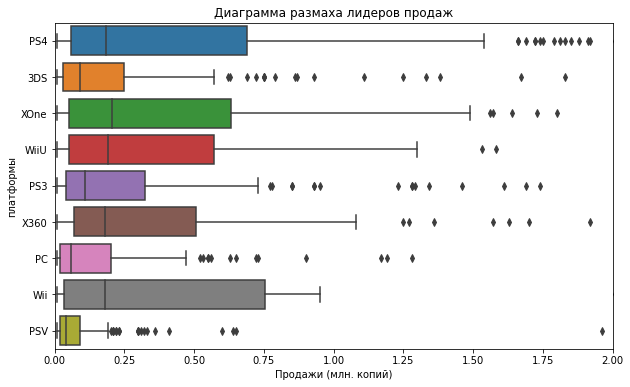

In [33]:
xlim = [0,2]
graph_box(actual_platform['total_sales'], actual_platform['platform'], 'Продажи (млн. копий)',
          'платформы', xlim, 'Диаграмма размаха лидеров продаж')

**Промежуточный вывод:** Заметно, что средняя Xone больше чем у лидера продаж PS4. Это означает о стабильности продаж, а у PS4 из за большего кол-ва выбросов, стоит подметить, что они возможно выпускают больше хитов продаж. Также стоит заметить, что у платформ Wii,WiiU,X360 средние продажи примерно одинаковые с лидером PS4, однако эти платформы изжили себя. 

#### Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

Возьмем PS4 который является лидером продаж за последние три года. Красные точки - оценка критиков, Синие точки - оценка пользователей 

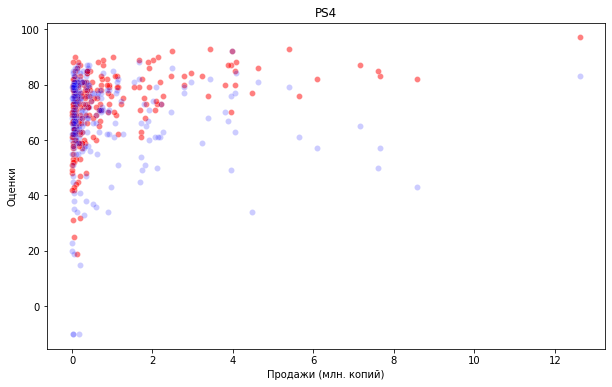

Корреляция продаж и оценки критиков для платформы "PS4": 0.403
Корреляция продаж и оценки пользователей для платформы "PS4": -0.005


In [34]:
platform_ps4 = actual_platform[(actual_platform['platform'] == 'PS4') & (actual_platform['critic_score'] > 0)]
graph_scatter(platform_ps4, 'PS4')

**Промежуточный вывод:** есть какая то связь между оценками критиков и продажами, чем выше оценка, тем выше продажи, однако это не прям сильная связь, так как корреляция равна 0.4. Связи между оценками пользователей и продажами нет, однако пользователи ставят оценки намного чаще. 

Стоит посмотреть и другие платформы

#### Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

/tmp/ipykernel_195/1694641778.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


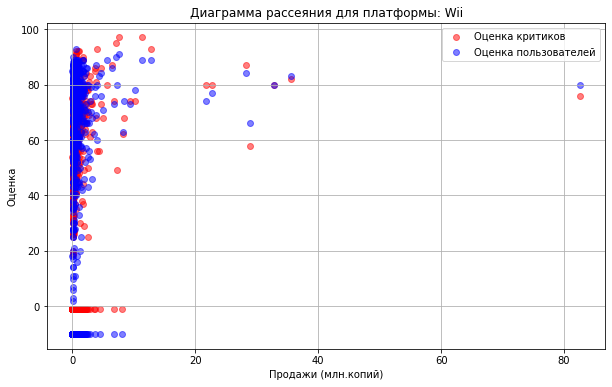

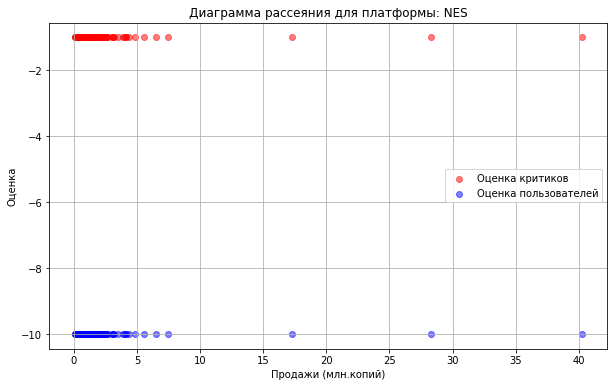

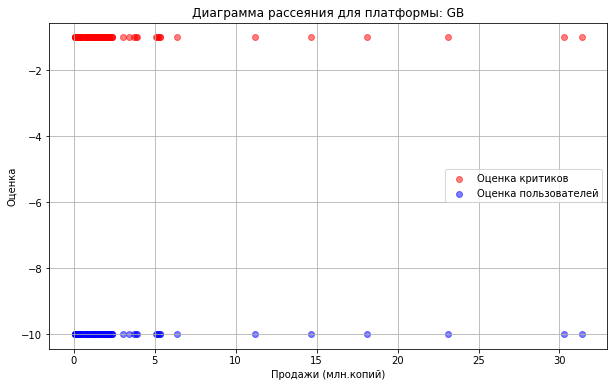

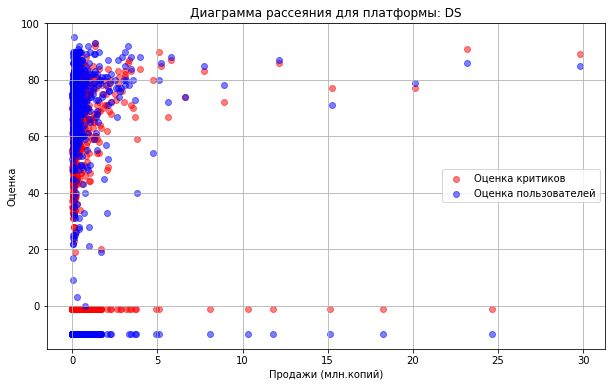

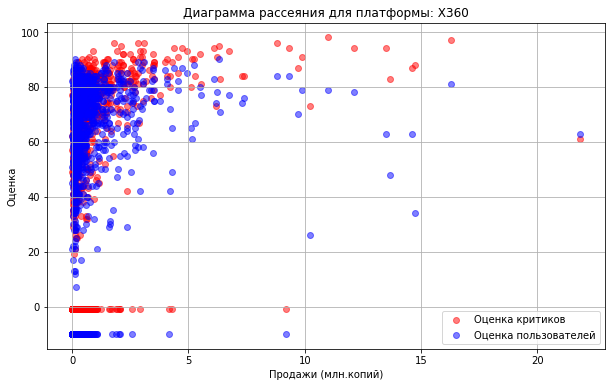

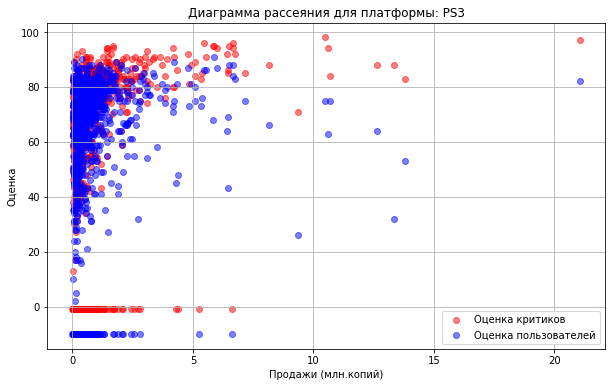

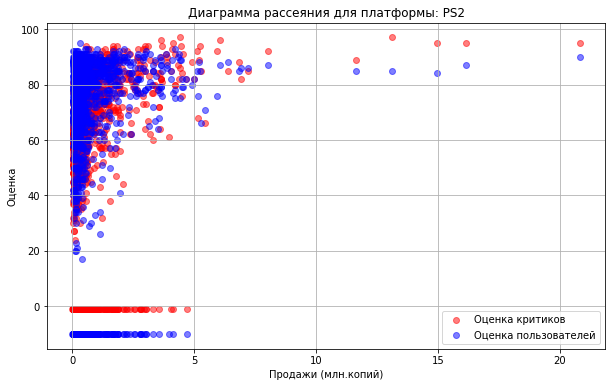

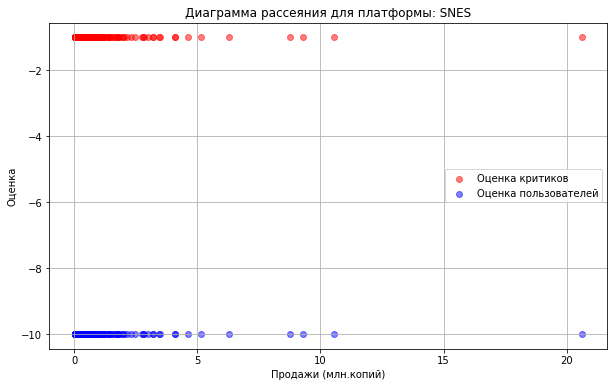

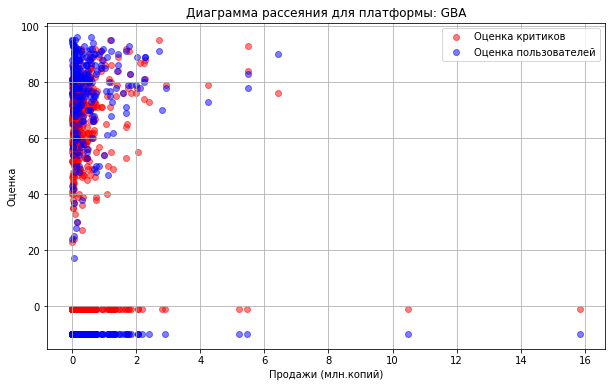

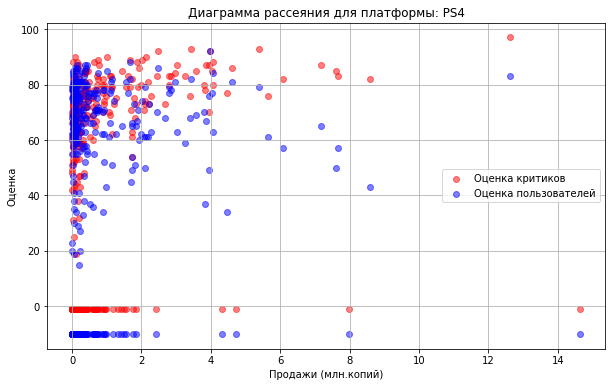

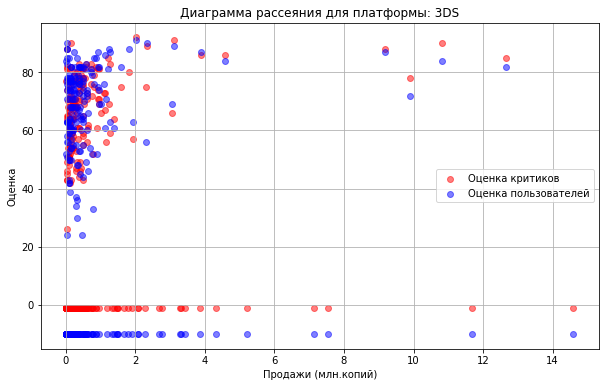

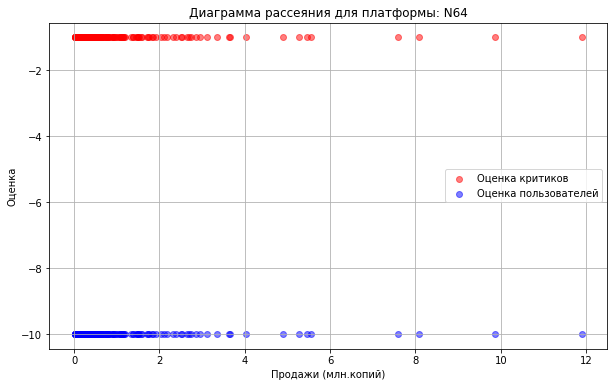

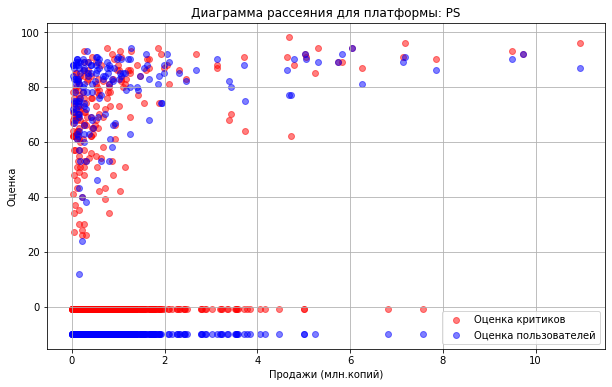

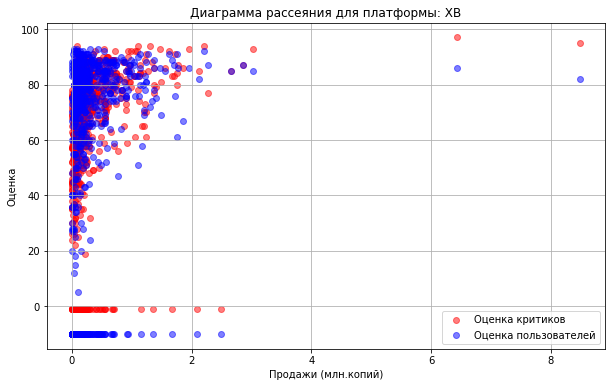

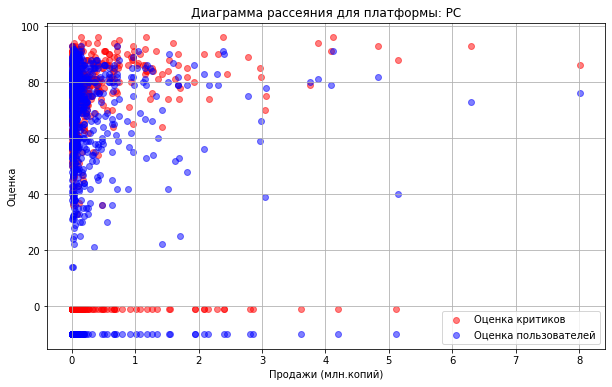

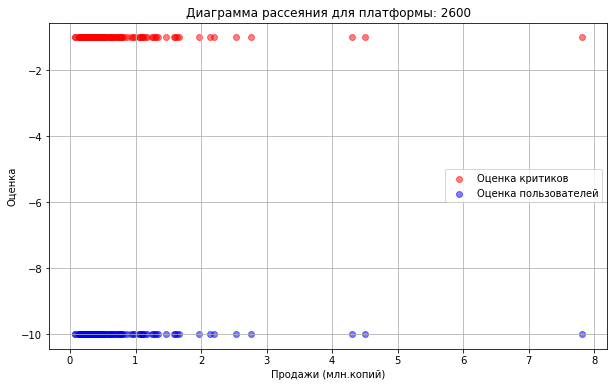

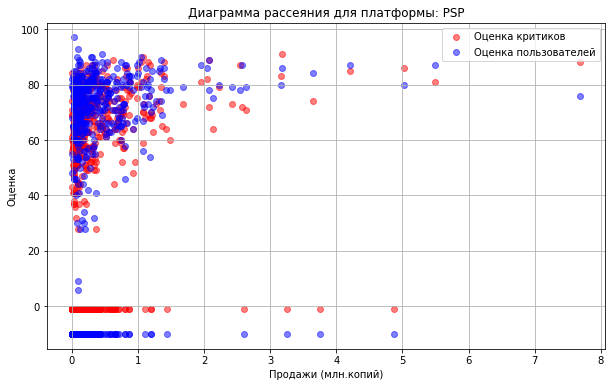

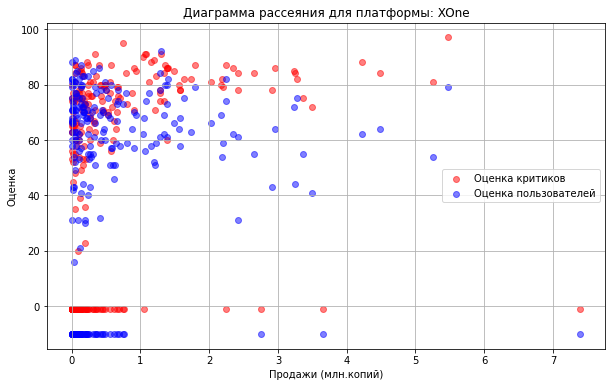

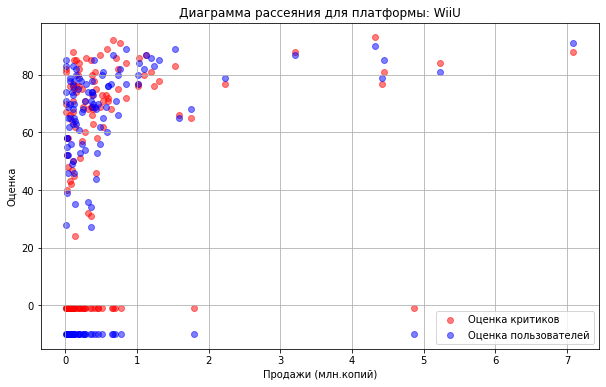

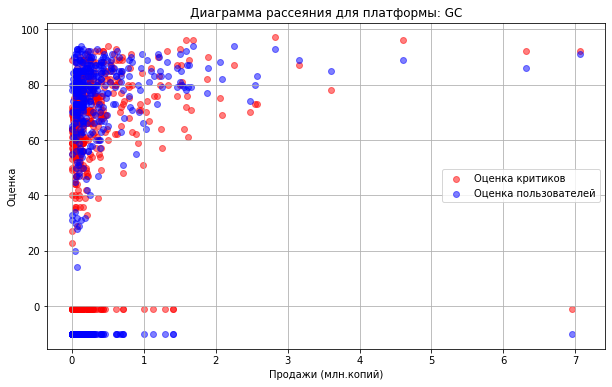

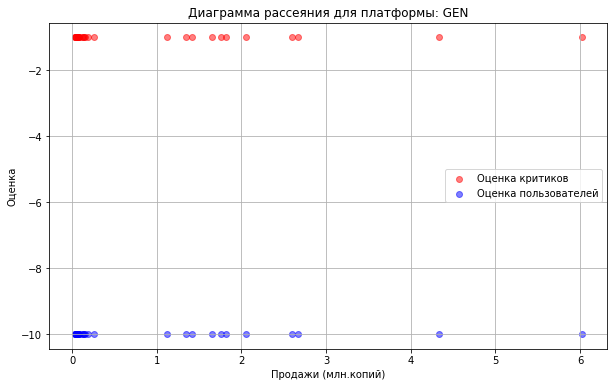

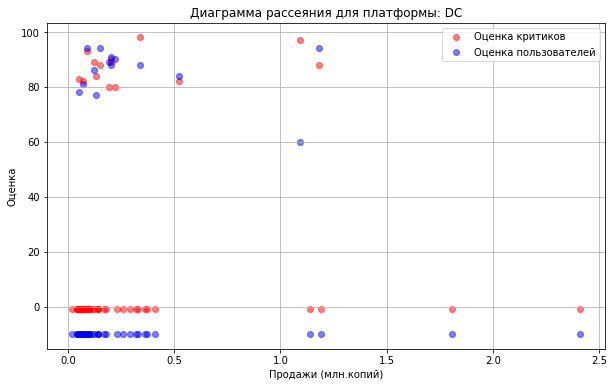

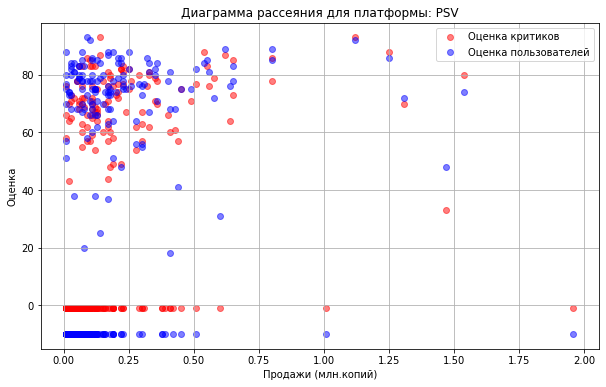

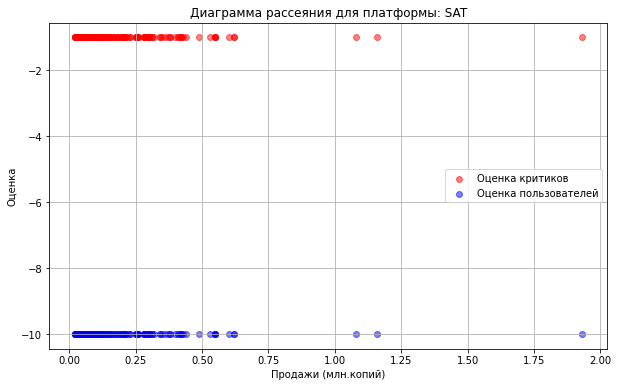

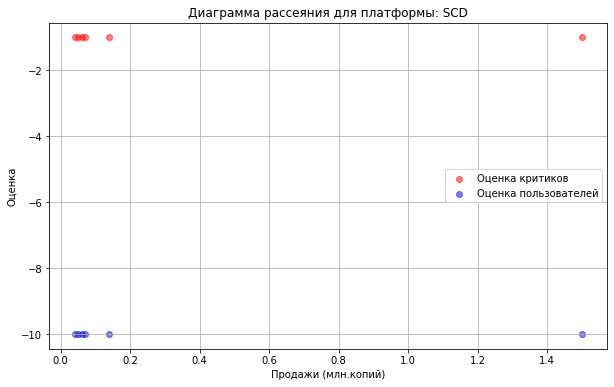

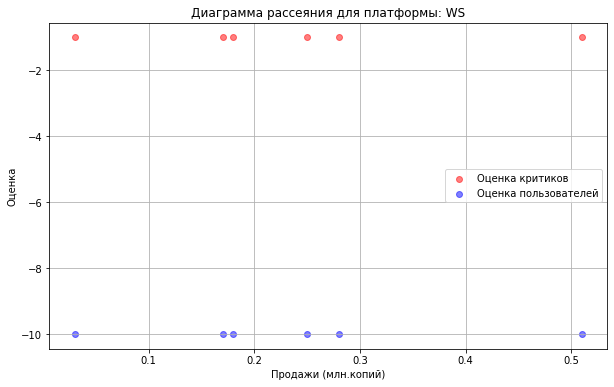

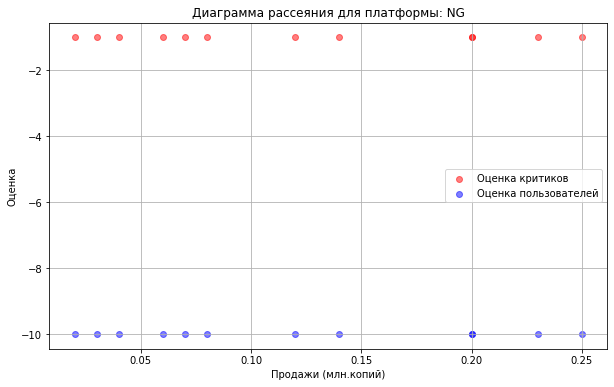

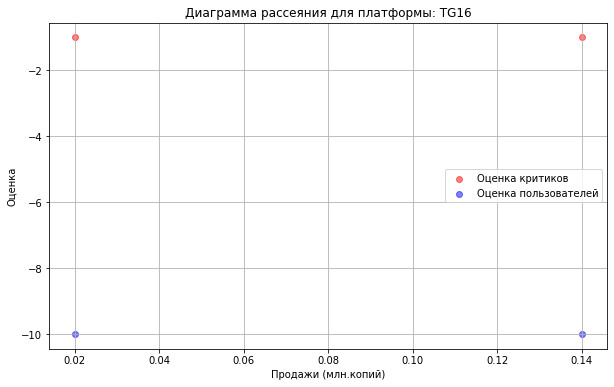

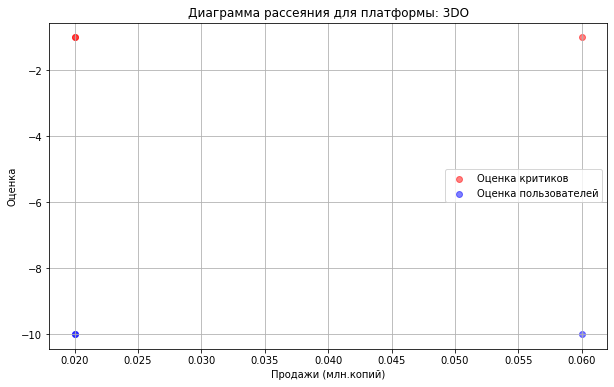

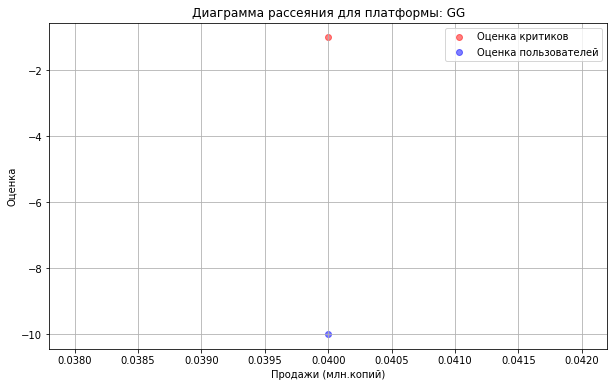

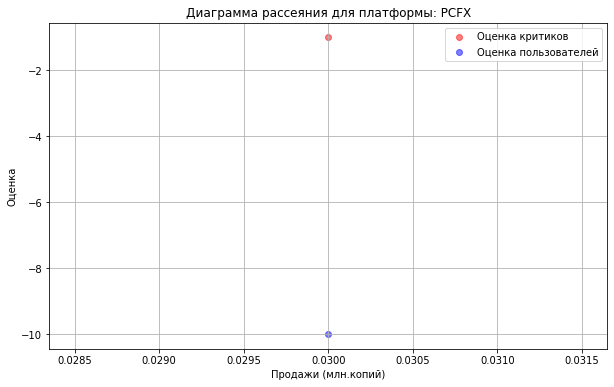

In [35]:
platforms = games['platform'].unique()
for platform in platforms:
    platform_data = games[games['platform'] == platform]
    critic_data = platform_data[platform_data['critic_score'] != 0]
    user_data = platform_data[platform_data['user_score'] != 0]
    plt.figure(figsize=(10, 6))
    plt.scatter(platform_data['total_sales'], platform_data['critic_score'], alpha=0.5, label='Оценка критиков', color='red')
    plt.scatter(platform_data['total_sales'], platform_data['user_score'], alpha=0.5, label='Оценка пользователей', color='blue')
    plt.title(f'Диаграмма рассеяния для платформы: {platform}')
    plt.xlabel('Продажи (млн.копий)')
    plt.ylabel('Оценка')
    plt.legend()
    plt.grid(True)

**Промежуточный вывод:** Это же тенденция сохраняется и на других платформах, где есть средняя корреляция между оценками критиков и продажами и нулевая корреляция между оценками пользователей и продажами

#### Посмотрите на общее распределение игр по жанрам.

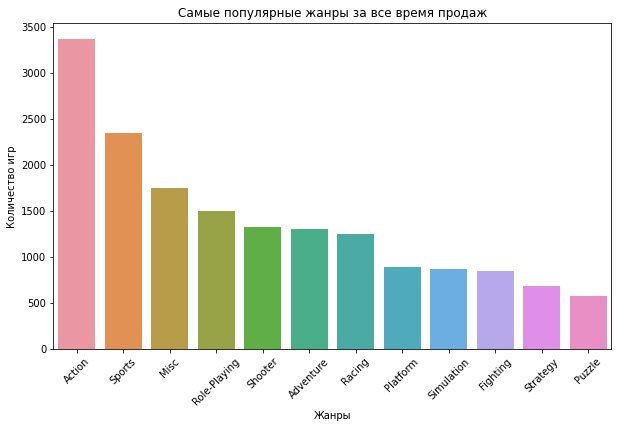

In [36]:
game_genre_quantity = games.pivot_table(index = 'genre', values = 'name',
                                  aggfunc = 'count').sort_values('name', ascending = False)
graph_bar(game_genre_quantity, 'name', 'Жанры', 'Количество игр', 'Cамые популярные жанры за все время продаж')

**Промежуточный вывод:** лидером по кол-ву игр является жанр Actions, с большим отрывом на втором месте жанр Sports

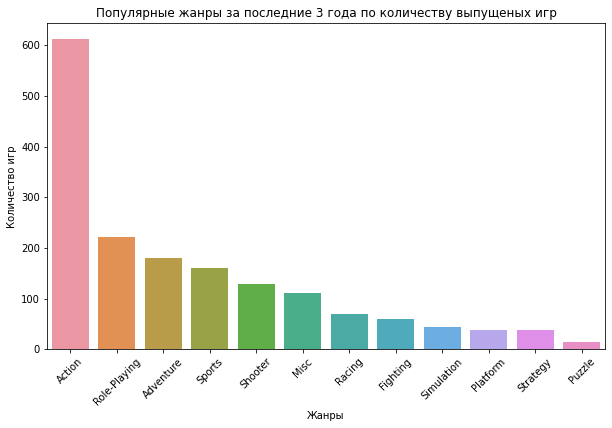

In [37]:
actual_game_genre_quantity= actual_platform.pivot_table(index = 'genre', values = 'name',
                                                      aggfunc = 'count').sort_values('name', ascending = False)
graph_bar(actual_game_genre_quantity, 'name', 'Жанры', 'Количество игр', 'Популярные жанры за последние 3 года по количеству выпущеных игр')

**Промежуточный вывод:** Лидером также является жанр Actions, однако за последние три года начали больше выпускаться жанры Role-Playing и Adventure

##### Теперь рассмотрим жанры относительно количество продаж

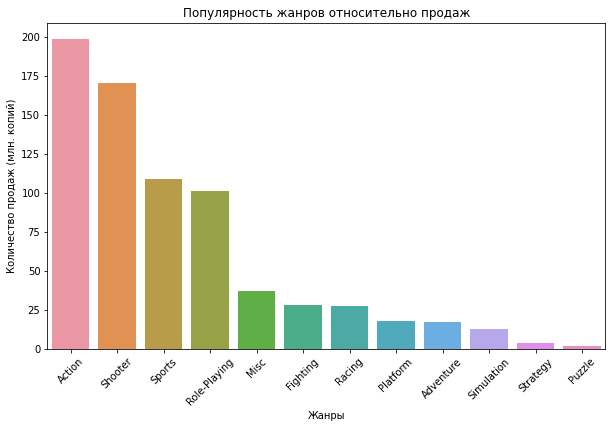

In [38]:
actual_game_genre_sales = actual_platform.pivot_table(index = 'genre', values = 'total_sales',
                                                      aggfunc = 'sum').sort_values('total_sales', ascending = False)
graph_bar(actual_game_genre_sales, 'total_sales', 'Жанры', 'Количество продаж (млн. копий)', 'Популярность жанров относительно продаж')

**Промежуточный вывод:** Лидером продаж также является жанр Actions, также в лидеры вышли с жанры Shooter и Sports. Возможно это связано с хитами игр, такие как CS, FIFA, UFC и прочее

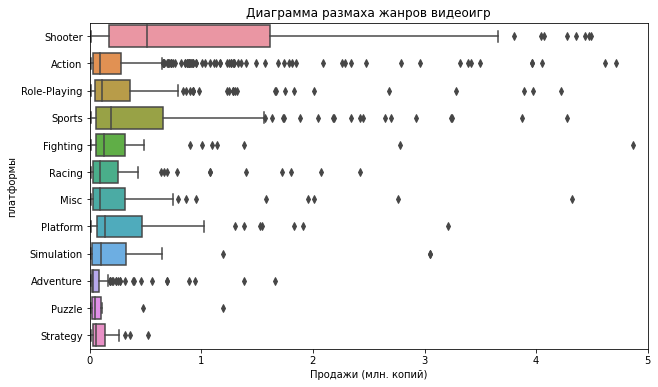

In [39]:
xlim = [0,5]
graph_box(actual_platform['total_sales'], actual_platform['genre'], 'Продажи (млн. копий)',
          'платформы', xlim, 'Диаграмма размаха жанров видеоигр')

**Промежуточный вывод:** Ситуация изменилась, лидером продаж стал жанр Shooter со значительным отрывом. Дальше следует жанр Sports. Жанр Actions имеет очень схожие среднее показатели продаж, как и остальные жанры, это означает, то что есть какие то хиты, которые и покупали много.

**Вывод:** 
- Средняя продолжительность "жизни" платформы составляет 10 лет;
- Средняя продолжительность нахождения на пике платформы составляет 3 года;
- Есть средняя корреляция между оценками критиков и продажами, что означает, что оценки критиков влияют на продажи игр, однако оценки пользователей влияют на продажи минимально;
- В настоящий момент популярные платформы такие как PS4 и Xone, однако их продажи падают на данный момент;
- Популярные жанры по кол-ву игр за все время Actions, Sports и Misc;
- За последние три года популярные жанры по кол-ву игр Action,Role-Playing, Adventure
- Жанры лидеры по продажам Actions Shooter, Sports. Однако более стабильный из них являются жанры Shooter и Sports

Стоит подождать новую платформу, так как у популярных платформ сейчас падают продажи. Также стоит вкладываться в жанры Shooter и Sports, так как они имеют более лучшие средние продажи, значит большинство игр такого жанра обретают свои продажи.

### Составьте портрет пользователя каждого региона

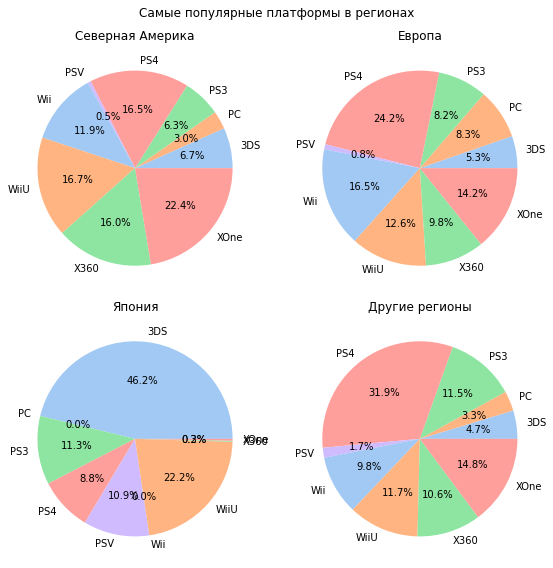

In [40]:
platform_region_sales=actual_platform.pivot_table(index='platform',
                                                  values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
graph_pie(platform_region_sales, 'Самые популярные платформы в регионах')

**Промежуточный вывод:** Так в Японии любят платформу любят 3DS - 46,2%,  в остальных трех регионах процент данной платформы составляет от 4 до 7 %. Чуть схожая ситуация с платформой WiiU, где в Японии платформа составляет -22,7%, а в остальных регионах от 12 до 17%. Теперь в Европе и в Других регионах популярна платформа PS4 - 24,2% и 31,9% соотвественно, в Северной Америке меньше 16,5%, в Японии вдвое меньше чем в Северной Америке 8,8%. Другая популярная платформа Xone в Северной Америке самая популярная -22,4%, в Европе и других регионах - 14%, а в Японии его показатель близок к 0%.

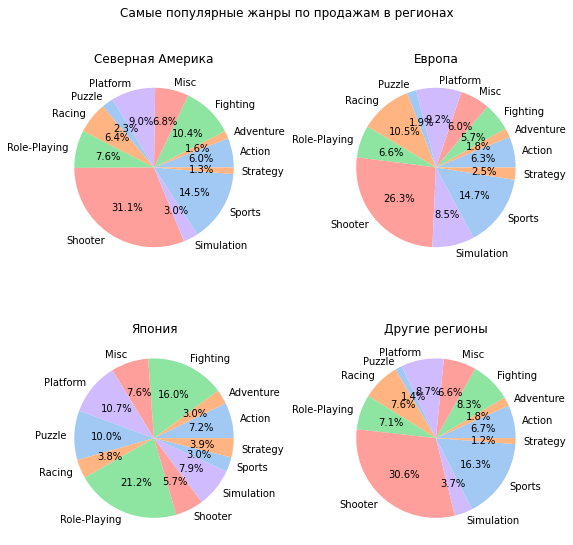

In [41]:
genre_region_sales=actual_platform.pivot_table(index='genre',
                                               values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
graph_pie(genre_region_sales, 'Самые популярные жанры по продажам в регионах')

**Промежуточный вывод:** Во всех регионах, кроме Японии схожая картина. Лидирует жанр шутер, его процент колеблется от 26 до 31%, лидером жанра стала Северная Америка. Однако в Японии процент жанра Shooter составляет - 5,7%. Следующий популярный жанр это Sports, его процент колеблется от 14 до 16%, лидером жанра стал Другие регионы. В Японии популярность жанра Sports составляет - 3%.  В Японии самый популярный жанр это Role-playing его процент популярности -21,2%, а в остальных регионах популярность данного жанра примерно равен 7%. Второй популярный жанр в Японии это Fighting - 16%, в остальных регионах процент популярности колеблется от 6 до 10%. 


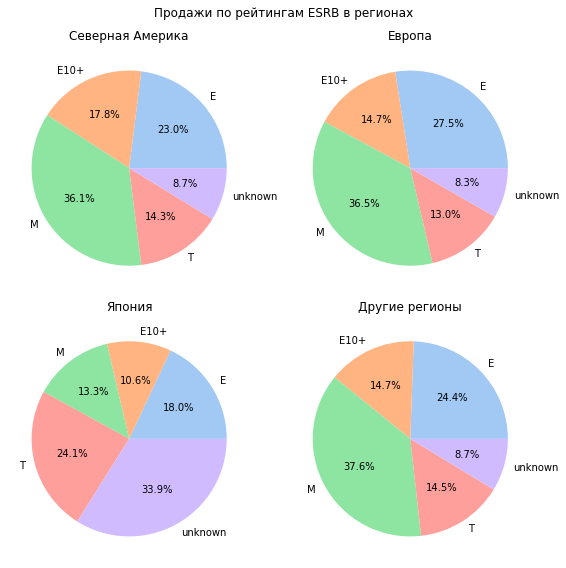

In [42]:
rating_region_sales=actual_platform.pivot_table(index='rating',
                                                values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
graph_pie(rating_region_sales, 'Продажи по рейтингам ESRB в регионах')

**Промежуточный вывод:** В Европе, в Северной Америке и других регионах популярная категория это М, его процент колеблется от 36-37%, однако в Японии популярность данной категории всего лишь 13%. Следующая популярная категория в этих трех регионах это категория - Е, его процент колеблется от 23 до 27%, в Японии его процент 18%. Теперь в Японии популярная категория это Unknown - 33.9%, в остальных регионах этот процент составляет -8,7%. Следующая категория популярная в Японии это Т, его процент 24,1%, в остальных регионах его процент колеблется от 13 до 14%. Однако, из за большего кол-во unknown, точный портрет игрока Японии по категориям составить нельзя, так как 34% данных по категориям игр нам неизвестно.

**Вывод:** Портреты игроков в Северной Америке,Европе и других регионах схожие. Они имеют примерные одинаковые предпочтения по платформам, жанрам и категориям.В Японии вкусы игроков по жанрам, платформам и категориям кардинально отличаются. 

**Платформы:** В Северной Америке популярные платформы PS4 и Xone, однако Xone американцам полюбился больше. Картина в Европе и в других регионах схожая, в отличии от Северной Америки, пользователям этим регионам значительно больше имеют платформ с PS4. У Японии совсем другая картина и распределение платформ. Лидеры платформ являются 3DS и WiiU. 

**Жанры:** В Северной Америке, Европе и в Других регионах игроки имеют схожие интересы. Так популярный жанр по проадажам  в таких регионах это Shooter и Sports. Однако, интересы Японских игроков отличаются кардинально. У них в лидерах продаж жанры такие как Role-playing и Fighting.

**Категории:** Трех регионах кроме Японии, лидерами в категориях являются категории M,E и Е10. В Японии данные категории занимают последние места, а в лидерах unknown и к сожалению из за потери данных или иных ошибок, нельзя точно сказать, какие категории в Японии популярны.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза (H0): средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза (H1): средние пользовательские рейтинги платформ Xbox One и PC разные

Гипотезы были сформулированы, по правилам нулевой гипотезы, где она гласит, что выборка данных имеют одинаковые показатели. А альтернативная гипотеза гласит обратное, то есть разное.

In [43]:
user_score_pc = games[(games['platform'] == 'PC') & (games['user_score'] > 0) & (games['year_of_release'] >= 2014)]['user_score']
user_score_xone = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)&(games['year_of_release'] >= 2014)]['user_score']

print('Количество значений выборки для платформы PC:', user_score_pc.shape[0])
print('Количество значений выборки для платформы XOne:', user_score_xone.shape[0])

Количество значений выборки для платформы PC: 122
Количество значений выборки для платформы XOne: 165


Из за того что,кол-во значений выборки в платформах разные, стоит применить параметр equal_var=False. Также для проверки гипотезы применим t-тест

In [44]:
alpha = 0.05 #Используем частые показатель как 5%

result = st.ttest_ind(user_score_pc, user_score_xone, equal_var = False)

print('Значение P-value ', round(result.pvalue, 5))

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Значение P-value  0.11601
Нет оснований отвергнуть нулевую гипотезу


Полученное значение p-value равна 0.11, поэтому нулевую гипотезу отвергнуть нельзя. Это означает, что средние пользовательские рейтинги двух платформ одинаковые. 

In [45]:
#Проверка
print('Средний пользовательский рейтинг платформы PC:', round(user_score_pc.mean(),2))
print('Средний пользовательский рейтинг платформы Xone', round(user_score_xone.mean(),2))

Средний пользовательский рейтинг платформы PC: 62.98
Средний пользовательский рейтинг платформы Xone 65.95


#### Средние пользовательские рейтинги жанров Actionи Sports разные.

Нулевая гипотеза (H0): средние пользовательские рейтинги жанров Action и Sports равны

Альтернативная гипотеза (H1): средние пользовательские рейтинги жанров Action и Sports разные

In [46]:
user_score_аction = games[(games['genre'] == 'Action')& (games['year_of_release'] >= 2014)]['user_score']
user_score_sports = games[(games['genre'] == 'Sports')& (games['year_of_release'] >= 2014)]['user_score']

print('Количество значений выборки для жанра Action:', user_score_аction.shape[0])
print('Количество значений выборки для жанра Sports:', user_score_sports.shape[0])

Количество значений выборки для жанра Action: 619
Количество значений выборки для жанра Sports: 161


Из за того что,кол-во значений выборки в платформах разные, стоит применить параметр equal_var=False. Также для проверки гипотезы применим t-тест

In [47]:
alpha = 0.05

result = st.ttest_ind(user_score_аction, user_score_sports, equal_var = False)

print('Значение P-value ', round(result.pvalue, 5))

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')


Значение P-value  5e-05
Отвергаем нулевую гипотезу


Полученное значение p-value близка к 0, поэтому можно отвергнуть нулевую гипотезу. Это означает, средние показатели рейтинга жанров Action и Sports разные

In [48]:
#Проверка
print('Средний пользовательский рейтинг жанра Action :', round(user_score_аction.mean(),2))
print('Средний пользовательский рейтинг жанра Sports', round(user_score_sports.mean(),2))

Средний пользовательский рейтинг жанра Action : 27.24
Средний пользовательский рейтинг жанра Sports 39.11


### Вывод

**Общий вывод**

**Предобработка данных**
- Все наименование столбцев приведены в змеиный регистр

- Были удалены две строки с наименованием игры

- Пропуски в user_score, critic_score были заменены на маркерные значение, также их превели в единый оценочный формат

- Пропуски в rating были заменены на unknown

- изменены типы данных в столбцах 'year_of_release' на int и  'user_score' на float

**Исследовательских анализ данных**

- В результате анализа было выяснено рост производства игр значительно увеличилось с 1994 года

- Пик по производству игр был в 2007 и 2008 годах

- Средняя продолжительность "жизни" платформы - 10 лет, средняя продолжительность пика популярности платформы - 3 года

- На  момент 2017 популярные платформы такие как PS4 и Xone, однако их продажи падают на данный момент;

- Популярные жанры по кол-ву игр за все время Actions, Sports и Misc,за последние три года популярные жанры по кол-ву игр Action,Role-Playing, Adventure

- Жанры лидеры по продажам Actions Shooter, Sports. Однако более стабильный из них являются жанры Shooter и Sports

- Также выяснилось, что оценки критиков все таки имеют среднее влияние на продажи, а оценки пользователей не имеют никакого отношения к продажам.

**Анализ портрета пользователей в разных регионах**

- В Северной Америке по продажам лидирует платформа Xbox One. Затем PlayStation 4, WiiU, Xbox 360 равными долями. Среди предпочитаемых жанров - Shooter и Sports. Популярные категории М и Е
- В Европейском регионе предпочитают игры на платформе PlayStation 4,затем XOne,WiiU. Популярные те же жанры Shooter и Sports. Категории также схожие, что и в Северной Америке: М и Е 
- Японский регион кардинально отличается от остальных регионов. Почти половину рынка занимает платформа 3DS. Популярны жанры Role-Playining и Fighting. К сожалению, не удалось определить точную статистику по категориям. 
- Другие регионы по предпочтениям платформ,жанрам и категориям близки к предпочтениям Европы.

**Проверка гипотез**
- 5.1  Мы подтвердили, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- 5.2 Мы подтвердили, что средние пользовательские рейтинги жанров Actionи Sports разные

**Рекомендации**

Потенциальный успешный продукт стоит ожидать на новой платформе, так как на данный момент у популярных платформ PS4 и Xone падают продажи. Также для всех регионов, кроме Японии стоит делать упор на жанрах Shooters и Sports,  так как эти жанры самые популярные. Также стоит делать игры категории М и Е. Стоит учесть предпочтения, критерии оценивания критиков, так как их оценка имеет среднее влияние на продажи игр. Если кампания хочет выйти в японский рынок, стоит рассмотреть платформу 3DS. Выбор жанра стоит остановить на Role_play и Fighting. Данный датасет, к сожалению не дал ответ, на какие категории стоит акцентировать внимание. 